## Evaluated TP, SOLAR Alexis

In [1]:
library("ggplot2")
library("gridExtra")
library(nortest)

# Part 1

## Exercice 1

## Question 1

First, we start by creating a data frame in which we compute the Benford's Law density

In [2]:
# different values that the law can take
x = c(1,2,3,4,5,6,7,8,9)

# definition of the function of the density
Benford = function(n){
    return(log((n+1)/n) / log(10))
}

# we compute the different values of pi and put it in a data frame
compt = 1
y = c()
while(compt <= length(x)){
    y = c(y,c(Benford(x[compt])))
    compt = compt + 1
}

df = data.frame(y=y)

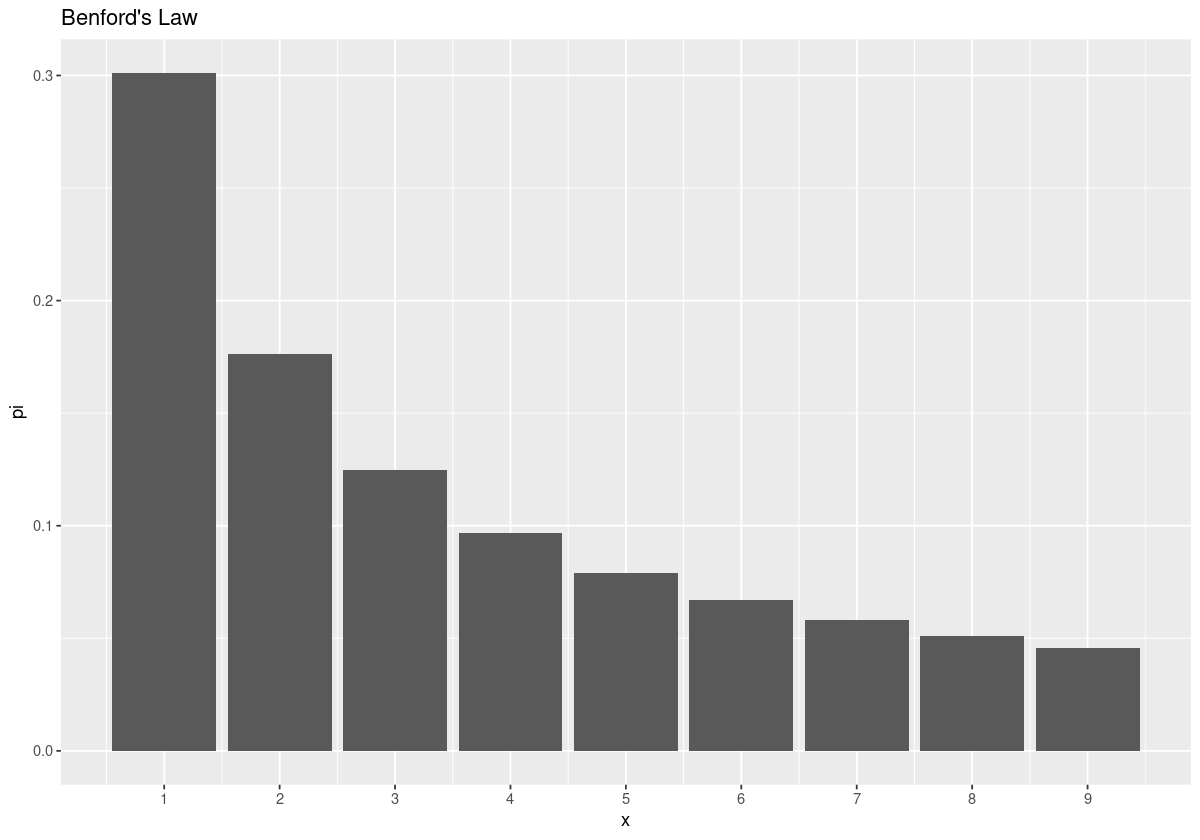

In [3]:
options(repr.plot.width=10, repr.plot.height=7)

ggplot(data=df, aes(x=x, y=y)) + geom_bar(stat="identity") + ggtitle("Benford's Law") + ylab("pi") + scale_x_continuous(breaks = 1:9)

## Question 2

In [4]:
# we load the data
movies <- read.table(file='Movies.csv',header=TRUE,sep=";", dec=',')
head(movies)

,X,year,length,budget,rating,Action,Animation,Comedy,Drama,Documentary,Romance
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1971,121,NA,6.4,0,0,1,1,0,0
2,2,1939,71,NA,6.0,0,0,1,0,0,0
3,3,1941,7,NA,8.2,0,1,0,0,0,0
4,4,1996,70,NA,8.2,0,0,1,0,0,0
5,5,1975,71,NA,3.4,0,0,0,0,0,0
6,6,2000,91,NA,4.3,0,0,0,1,0,0


Then we only take values from the column budget that are different from NA or 0

In [5]:
values = movies$budget[!is.na(movies$budget) & movies$budget>0]

then we define the function first_digit to get the first digit of a number

In [6]:
first_digit=function(n){
fd=0
compt=0
while(is.na(fd)||fd==0)
{
compt=compt+1
fd=as.integer(substr(as.character(n),compt,compt))
}
return(fd)
}

Now, we can use this function to get the first digit of each number in values and represent their proportion in a barplot

In [7]:
compt = 1
res = c()
while(compt <= length(values)){
    res = c(res,c(first_digit(values[compt])))
    compt = compt + 1
}

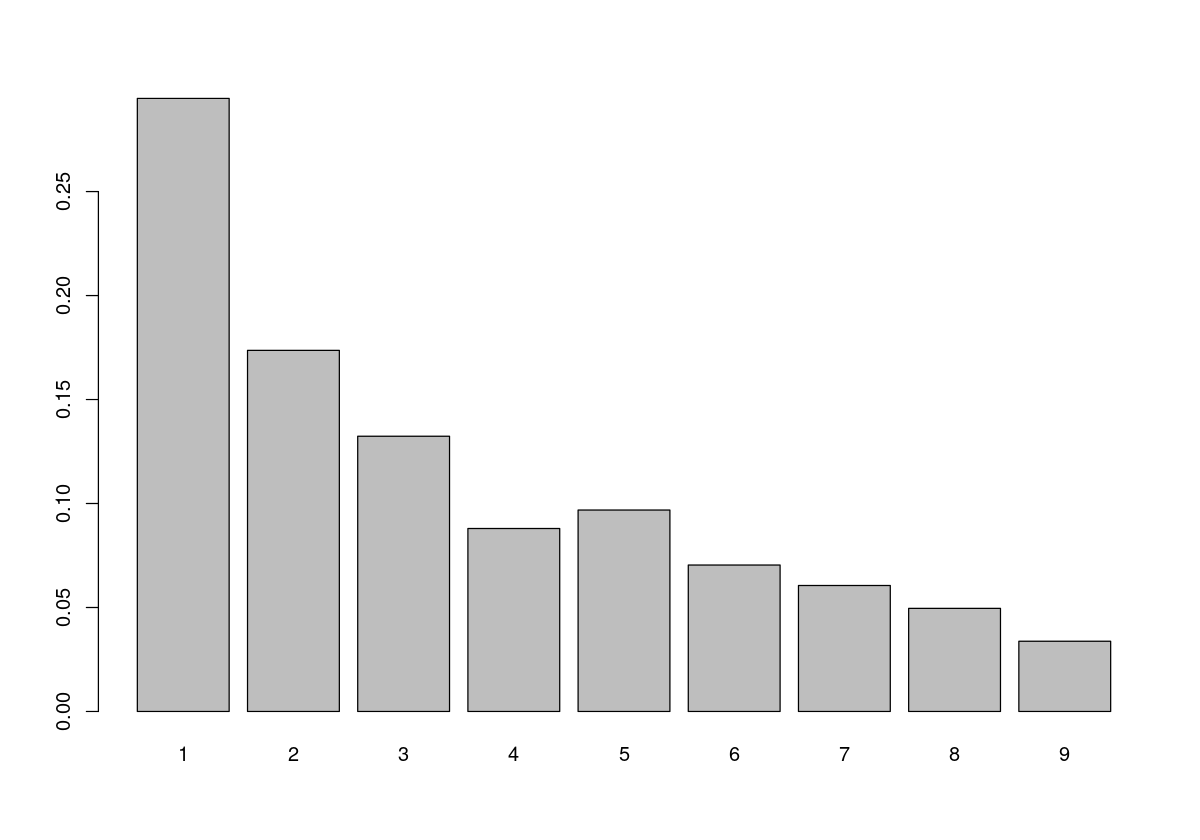

In [8]:
budget_density = table(res)/length(res)
barplot(budget_density)

We can now compare the two barplots

In [9]:
compt = 1
Benford_density = budget_density
while(compt <= length(budget_density)){
    Benford_density[compt] = y[compt]
    compt = compt + 1
}

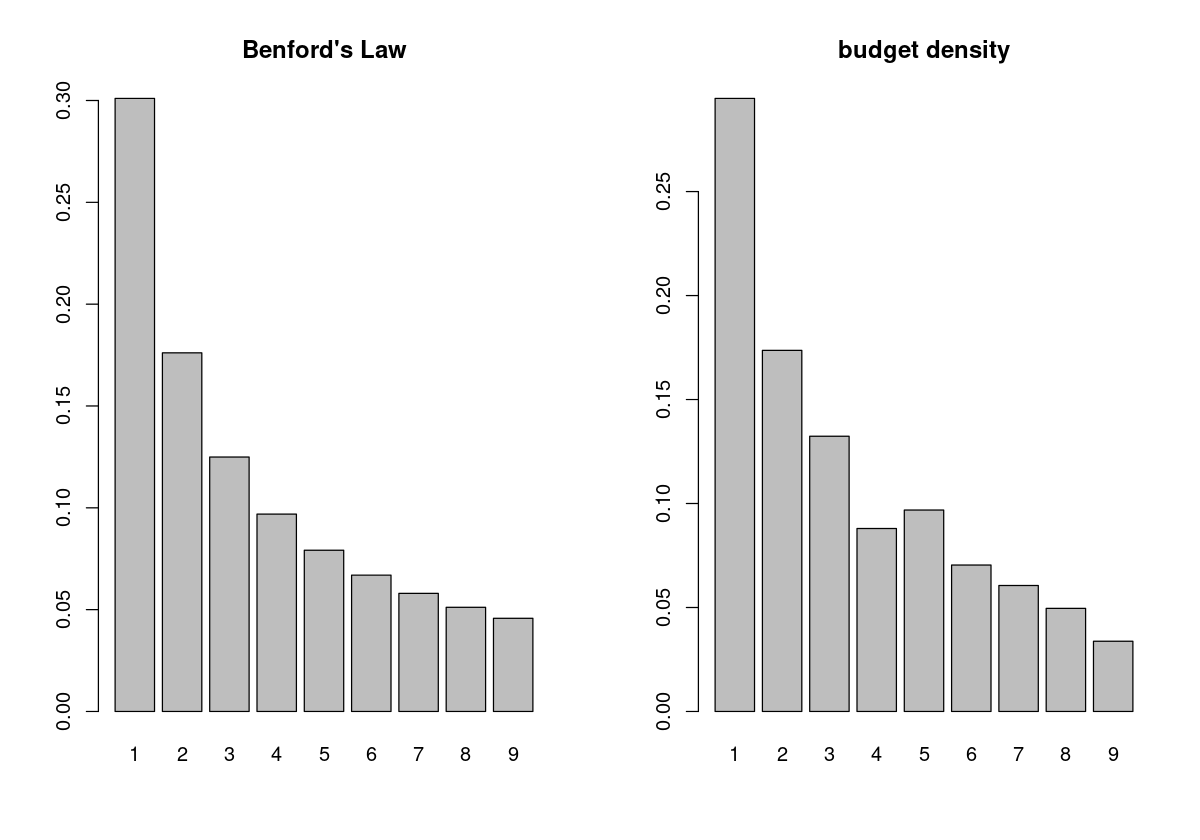

In [10]:
par(mfrow=c(1,2))
barplot(Benford_density, main="Benford's Law")
barplot(budget_density,main="budget density")

They seems de be similar graphically but we also remark that it doesn't fit perfectly while the amount of data is consequent.

## Question 3

We want to know if we can consider that the budget density follows a Benford's law

To do that, we can do a $\chi^2$ test, that is asymptotic, to verify the adaquation of our data to Benford's law

Here we test $H_0$: "the budget density follows a Benford's law" against $H_1$: "the budget density doesn't follow a Benford's law"

In [11]:
table(res)
chisq.test(x = table(res), p = y)

res
   1    2    3    4    5    6    7    8    9 
1528  900  686  456  502  365  314  257  175 


	Chi-squared test for given probabilities

data:  table(res)
X-squared = 45.913, df = 8, p-value = 2.469e-07


The p-value is very low so we reject $H_0$ and accept $H_1$ with a risk $\alpha = 5\%$

We can conclude that the first digits in the column budget don't follow a Benford's law

## Exercice 2

## Question 1

In [12]:
movies$duree = ifelse(movies$length >= 120, "Long", "Court")

head(movies)

,X,year,length,budget,rating,Action,Animation,Comedy,Drama,Documentary,Romance,duree
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,1971,121,NA,6.4,0,0,1,1,0,0,Long
2,2,1939,71,NA,6.0,0,0,1,0,0,0,Court
3,3,1941,7,NA,8.2,0,1,0,0,0,0,Court
4,4,1996,70,NA,8.2,0,0,1,0,0,0,Court
5,5,1975,71,NA,3.4,0,0,0,0,0,0,Court
6,6,2000,91,NA,4.3,0,0,0,1,0,0,Court


## Question 2

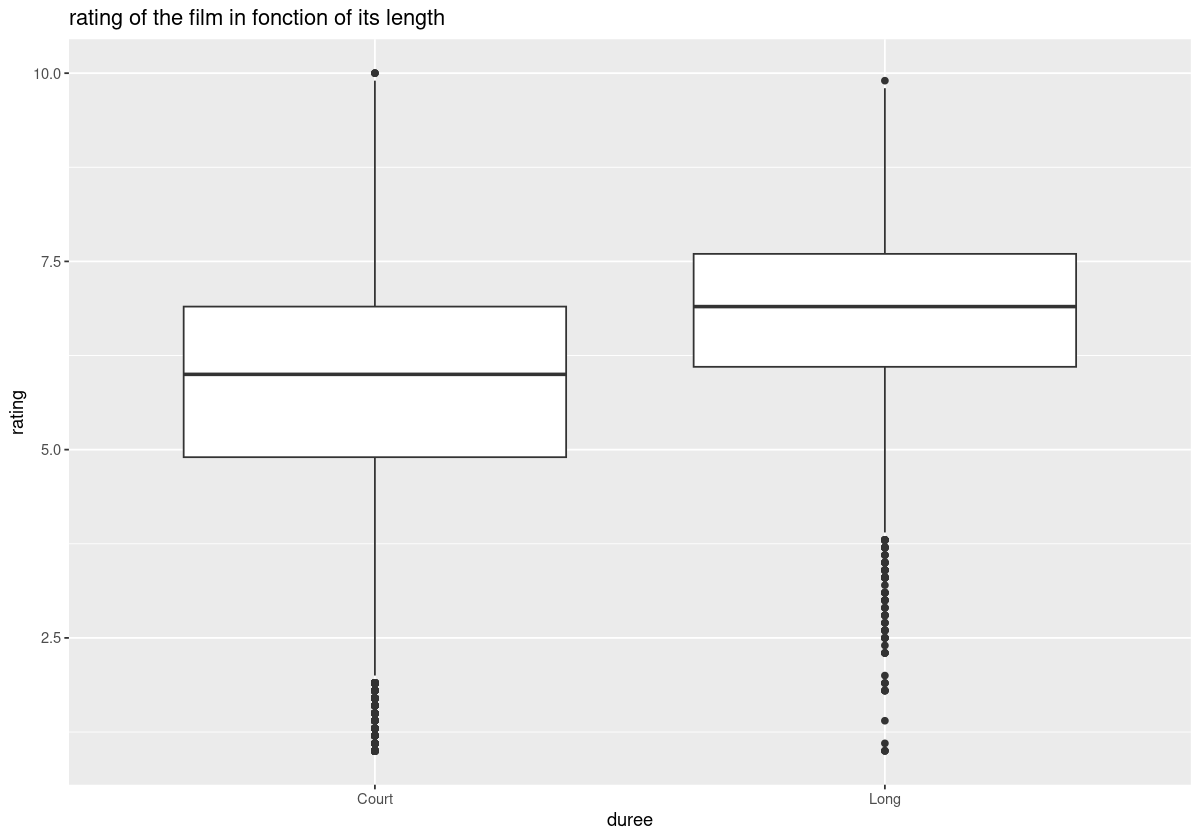

In [13]:
plot = ggplot(data = movies, aes(x = duree, y = rating)) + geom_boxplot() + ggtitle("rating of the film in fonction of its length")
plot

We observe that the rating seems to be better for a long film than a film that is short

## Question 3

The variable duree is qualitative and the variable rating quantitative

To compare the effect of the variable duree on the rating of the film, we start by separating the two different categories of film

In [14]:
Long_movies = movies[c(movies$duree == "Long"),1:12]
head(Long_movies)

,X,year,length,budget,rating,Action,Animation,Comedy,Drama,Documentary,Romance,duree
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,1971,121,NA,6.4,0,0,1,1,0,0,Long
32,32,1987,140,NA,5.9,0,0,0,1,0,0,Long
42,42,1941,120,NA,7.2,0,0,0,1,0,0,Long
44,44,1986,133,NA,7.3,0,0,0,1,0,0,Long
101,101,2002,155,NA,6.6,0,0,0,0,1,0,Long
105,105,1960,125,NA,7.3,0,0,0,1,0,0,Long


In [15]:
Short_movies = movies[c(movies$duree == "Court"),1:12]
head(Short_movies)

,X,year,length,budget,rating,Action,Animation,Comedy,Drama,Documentary,Romance,duree
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2,2,1939,71,NA,6.0,0,0,1,0,0,0,Court
3,3,1941,7,NA,8.2,0,1,0,0,0,0,Court
4,4,1996,70,NA,8.2,0,0,1,0,0,0,Court
5,5,1975,71,NA,3.4,0,0,0,0,0,0,Court
6,6,2000,91,NA,4.3,0,0,0,1,0,0,Court
7,7,2002,93,NA,5.3,1,0,0,1,0,0,Court


In [16]:
n = nrow(Long_movies)
m = nrow(Short_movies)
c(n, m)

[1]  4248 54540

We observe that the amount of data is different in the two categories

In [17]:
c(mean(Long_movies$rating), var(Long_movies$rating))

[1] 6.758686 1.565128

In [18]:
c(mean(Short_movies$rating), var(Short_movies$rating))

[1] 5.868528 2.420630

Their mean and variance are also different

We will compute a Welch's test to compare the effect of the two categories, but to know if the test is asymptotic or not, we want to know if we can consider that the ratings are gaussian

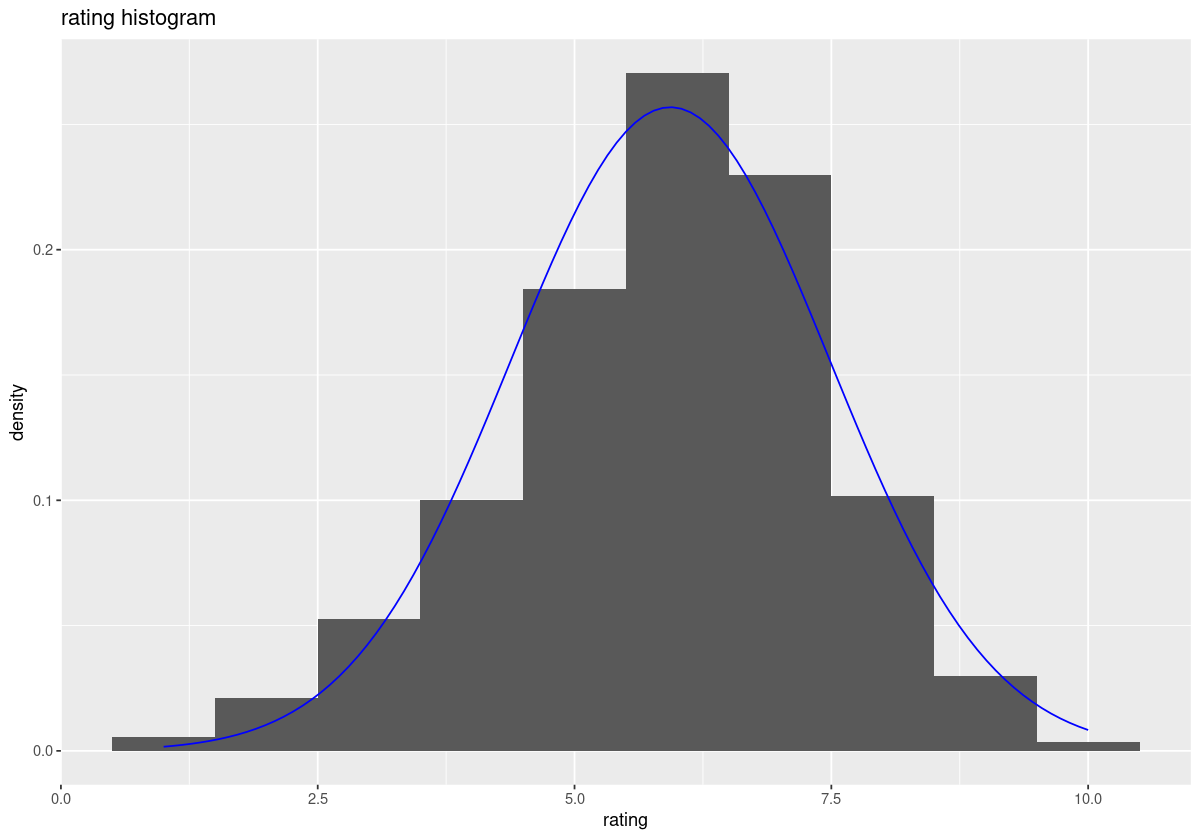

In [19]:
plot = ggplot(data=movies)  + geom_histogram(aes(x = rating, y = after_stat(density)), bins = 10) + ggtitle("rating histogram")
m <- mean(movies$rating)
s <- sd(movies$rating)
plot +  stat_function(fun = dnorm, args = list(mean = m, sd = s), col="blue")

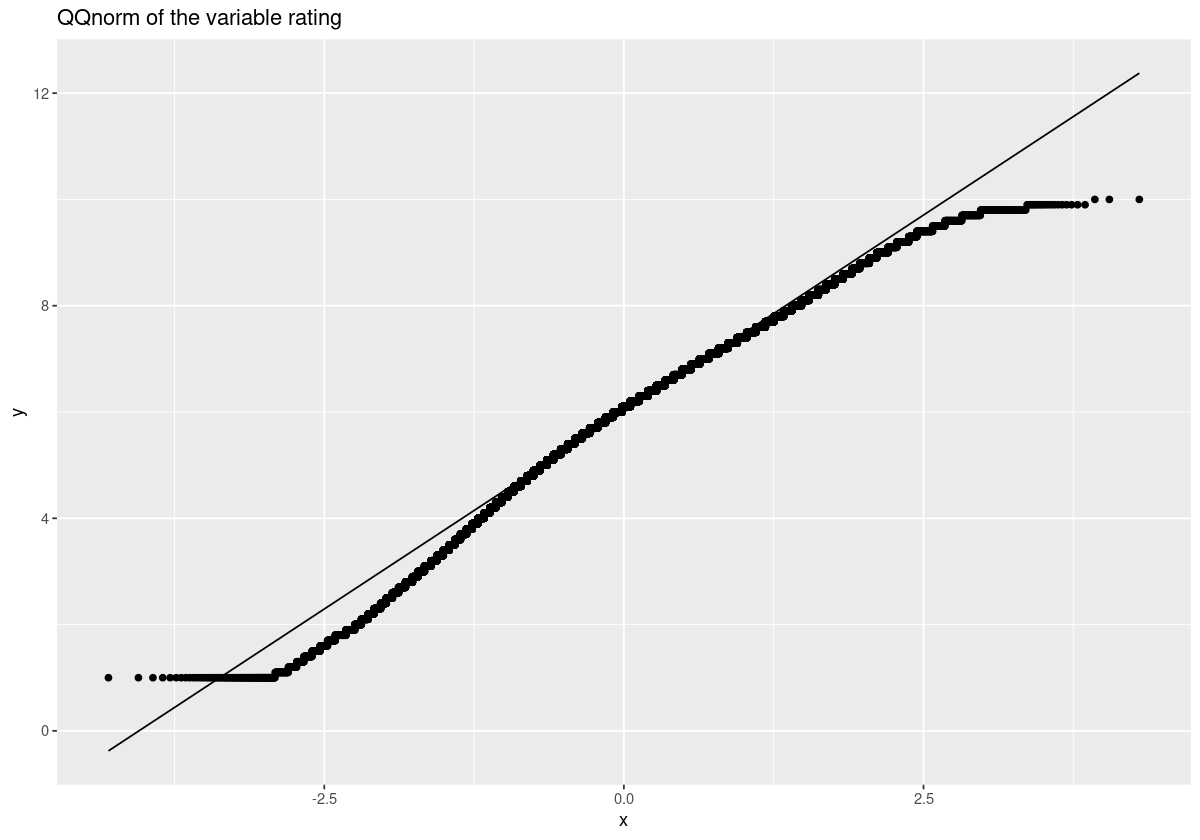

In [20]:
ggplot(movies, aes(sample=rating))+ stat_qq() + stat_qq_line() + ggtitle("QQnorm of the variable rating")

We can do a Lilliefors' test 

Here we test $H_0$: "the distribution of the variable rating is gaussian" against $H_1$: "the distribution of the variable rating is not gaussian"

In [21]:
lillie.test(movies$rating)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  movies$rating
D = 0.052932, p-value < 2.2e-16


The p-value is very low so we reject $H_0$ and accept $H_1$ with a risk $\alpha = 5\%$

So the Welch's test is asymptotic

Here we test $H_0$: "The mean of rating in the long films is the same as the mean of the rating in the short films" against $H_1$: "the mean of rating is different in the two categories"

In [22]:
t.test(Long_movies$rating, Short_movies$rating ,data=movies, var.equal=FALSE)


	Welch Two Sample t-test

data:  Long_movies$rating and Short_movies$rating
t = 43.811, df = 5325.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8503271 0.9299904
sample estimates:
mean of x mean of y 
 6.758686  5.868528 


Again, the p-value is very low so we reject $H_0$ and accept $H_1$ with a risk $\alpha = 5\%$

the test is asymptotic but we have enough data to conclude that the difference between the 2 groups is significant and the duration of the film impacts its rating

## Exercice 3

## Question 1

In [23]:
movies_genre = read.table(file='Movies_genre.csv',header=TRUE,sep=";", dec=',')
head(movies_genre)

,X,year,length,budget,rating,Genre,Genre_bin
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>
1,1,1971,121,NA,6.4,Comedy,1
2,2,1971,121,NA,6.4,Drama,1
3,3,1939,71,NA,6.0,Comedy,1
4,4,1941,7,NA,8.2,Animation,1
5,5,1996,70,NA,8.2,Comedy,1
6,6,2000,91,NA,4.3,Drama,1


In [24]:
movies_genre$Satisfaction <- cut(
  movies_genre$rating,
  breaks = c(0, 5, 7.5, 11),
  labels = c("Mauvais", "Moyen", "Bon"),
  right = FALSE
)

head(movies_genre)

,X,year,length,budget,rating,Genre,Genre_bin,Satisfaction
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<fct>
1,1,1971,121,NA,6.4,Comedy,1,Moyen
2,2,1971,121,NA,6.4,Drama,1,Moyen
3,3,1939,71,NA,6.0,Comedy,1,Moyen
4,4,1941,7,NA,8.2,Animation,1,Bon
5,5,1996,70,NA,8.2,Comedy,1,Bon
6,6,2000,91,NA,4.3,Drama,1,Mauvais


## Question 2

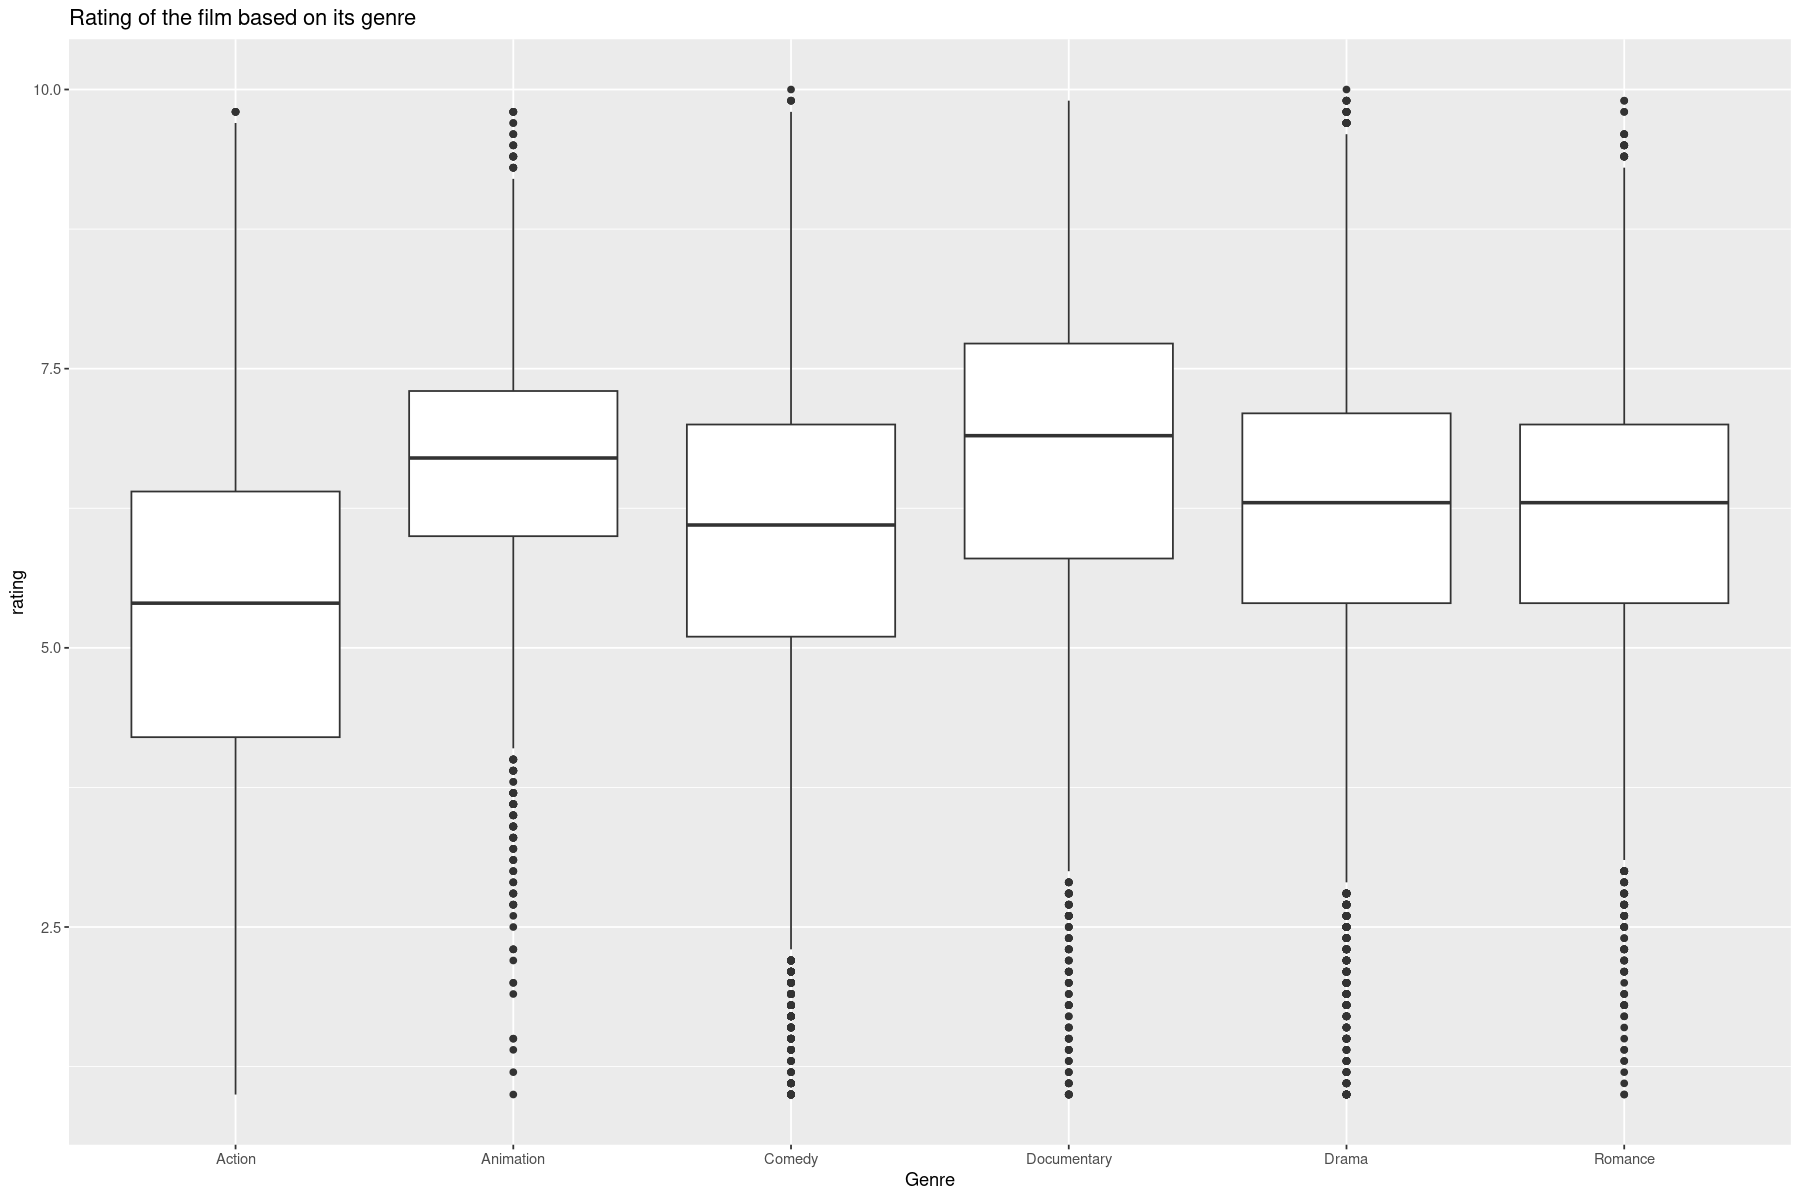

In [25]:
options(repr.plot.width=15, repr.plot.height=10)
plot = ggplot(data = movies_genre, aes(x = Genre, y = rating)) + geom_boxplot() + ggtitle("Rating of the film based on its genre")
plot

We observe that the genre of the film probably influence its rating. For exemple, actions films seems to be less well rated in general.

## Question 3

This time, we can compute a $\chi^2$ independance test to verify the independance between the rating of a film and its genre because we have 2 qualitative variables.

In [26]:
table(movies_genre$Genre, movies_genre$Satisfaction)

             
              Mauvais Moyen   Bon
  Action         1903  2424   361
  Animation       313  2580   797
  Comedy         3851 11125  2295
  Documentary     478  1824  1170
  Drama          3810 14573  3428
  Romance         747  3316   681

Here we test $H_0$: "the rating of a film is independant from its genre" against $H_1$: "the genre of a film impacts its rating"

In [27]:
chisq.test(movies_genre$Genre, movies_genre$Satisfaction)


	Pearson's Chi-squared test

data:  movies_genre$Genre and movies_genre$Satisfaction
X-squared = 2781.4, df = 10, p-value < 2.2e-16


The p-value is very low so we reject $H_0$ and accept $H_1$ with a risk $\alpha = 5\%$ and conclude that genre of a film has an influence on its rating.

# Part 2

In [28]:
load(url("https://www.biostatistics.dk/teaching/bioinformatics/data/gwaspt.rda"))
dim(phenotypes)
head(phenotypes)

[1] 1324    3

,BMI,gender,age
,<dbl>,<fct>,<dbl>
1,23.39,Female,33.02133
2,22.72,Female,28.32208
3,23.52,Male,25.73901
4,25.03,Male,30.80271
5,21.64,Female,34.95409
6,22.16,Male,28.13544


## Question 1 Etude de l’influence du genre sur le BMI

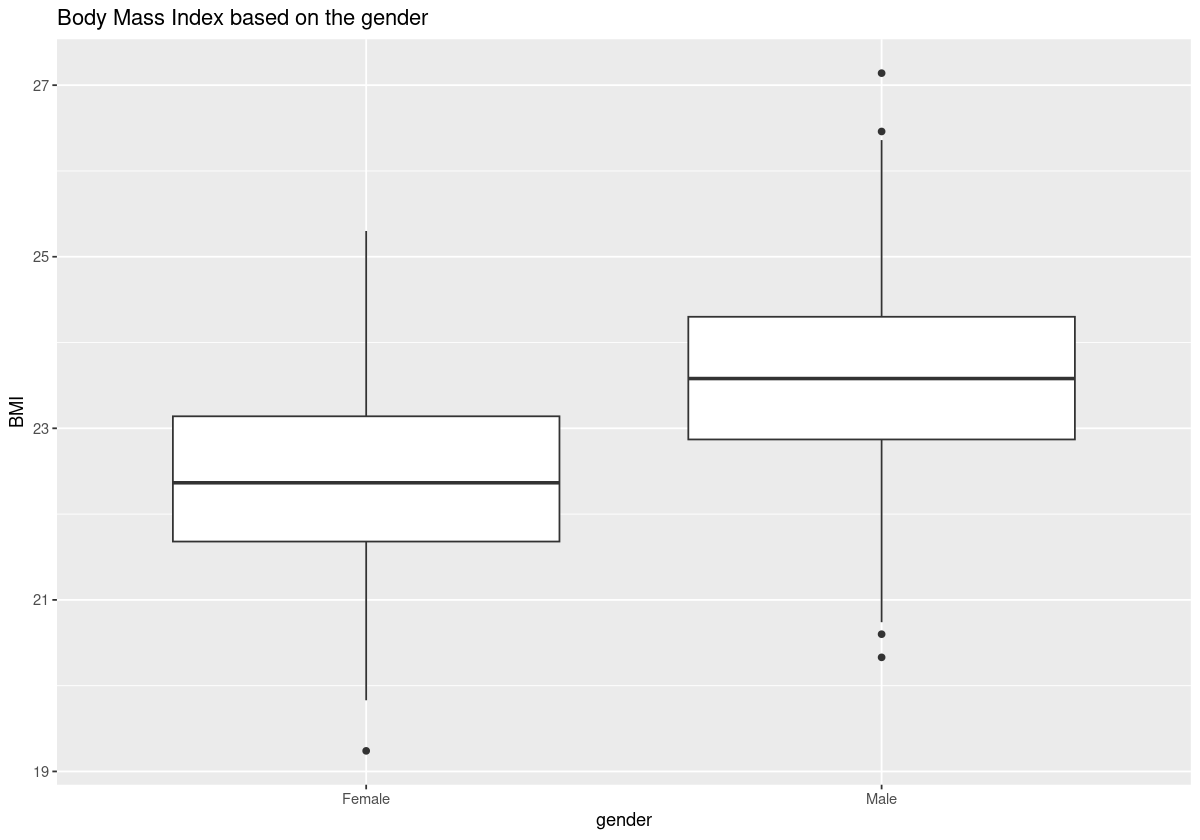

In [29]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(data = phenotypes, aes(x = gender, y = BMI)) + geom_boxplot() + ggtitle("Body Mass Index based on the gender")

We observe that the men seems to have an higher BMI than the women

## Question 2

Again, the variable gender is qualitative and the variable BMI is quantitative so, in first, we test the gaussianity of BMI

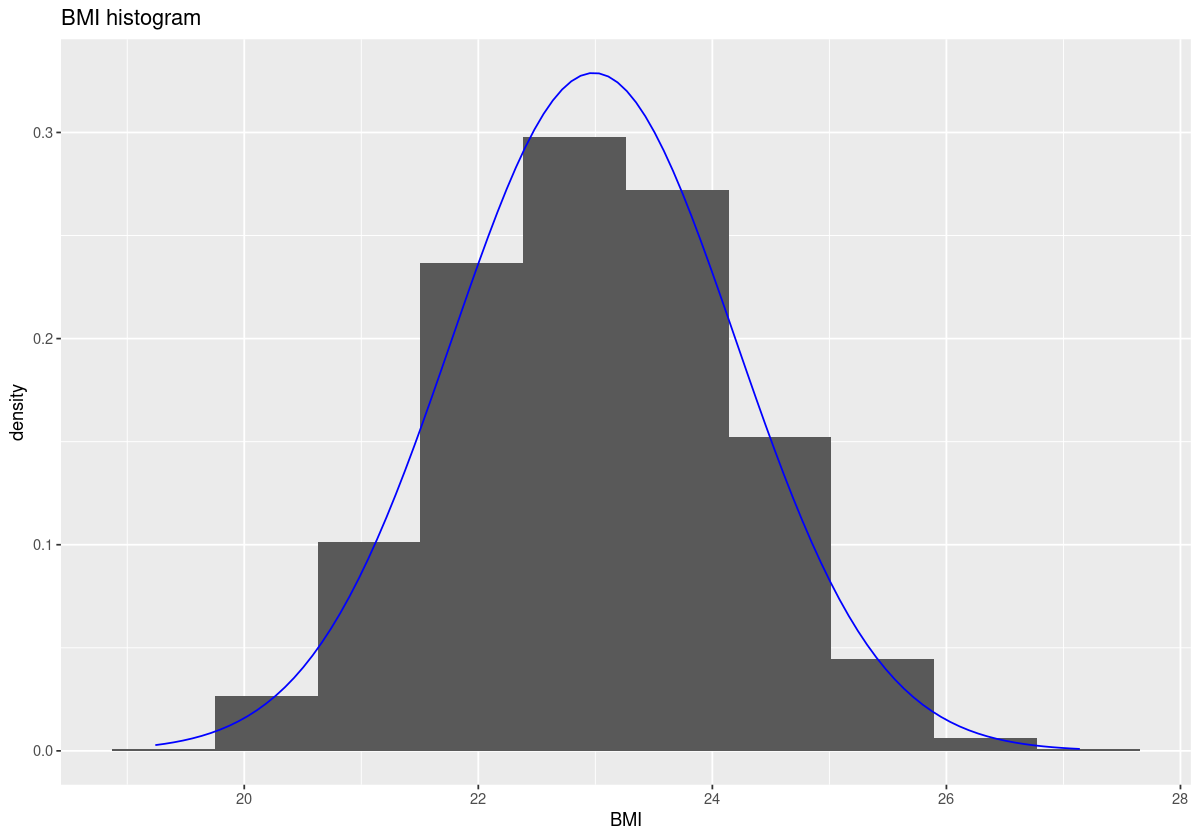

In [30]:
plot = ggplot(data=phenotypes)  + geom_histogram(aes(x = BMI, y = after_stat(density)), bins = 10) + ggtitle("BMI histogram")
m <- mean(phenotypes$BMI)
s <- sd(phenotypes$BMI)
plot +  stat_function(fun = dnorm, args = list(mean = m, sd = s), col="blue")

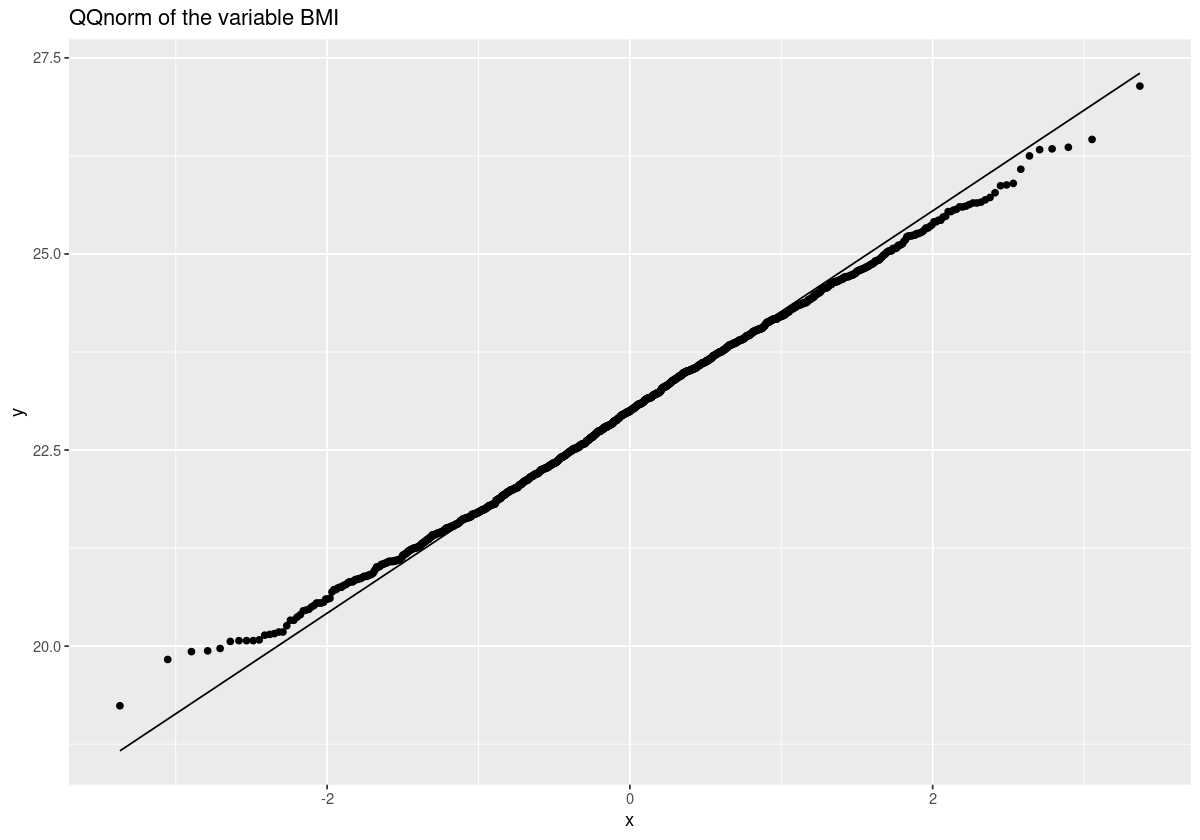

In [31]:
ggplot(phenotypes, aes(sample=BMI))+ stat_qq() + stat_qq_line() + ggtitle("QQnorm of the variable BMI")

We test $H_0$: "the distribution of the variable BMI is gaussian" against $H_1$: "the distribution of the variable BMI is not gaussian"

In [32]:
lillie.test(phenotypes$BMI)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  phenotypes$BMI
D = 0.022098, p-value = 0.1211


The p-value is higher than 0.05 here so we accept $H_0$ with a risk $\alpha = 5\%$ so the Welch's test is not asymptotic here

Now we test $H_0$: "The mean of the BMI of men is higher than the mean of the BMI of the women" against $H_1$: "The mean of the BMI of men is lower than the mean of the BMI of the women"

In [33]:
Men_BMI = phenotypes[c(phenotypes$gender == "Male"),1:3]
Women_BMI = phenotypes[c(phenotypes$gender == "Female"),1:3]
n = nrow(Men_BMI)
m = nrow(Women_BMI)
c(n, m)
c(mean(Men_BMI$BMI), var(Men_BMI$BMI))
c(mean(Women_BMI$BMI), var(Women_BMI$BMI))

[1] 656 668

[1] 23.564619  1.159741

[1] 22.418054  1.127162

We almost have the same amount of data for the both categories and their variance is simililar so we can suppose that they are the same

In [34]:
t.test(Men_BMI$BMI, Women_BMI$BMI ,data=phenotypes, var.equal=TRUE, alternative="less")


	Two Sample t-test

data:  Men_BMI$BMI and Women_BMI$BMI
t = 19.508, df = 1322, p-value = 1
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 1.243307
sample estimates:
mean of x mean of y 
 23.56462  22.41805 


The p-value is 1 so we accept $H_0$ with a risk $\alpha = 5\%$ and conclude that the BMI is higher for the men than the women

## Question 1 "Etude du lien entre la génétique et le BMI"

In [35]:
load(url("https://www.biostatistics.dk/teaching/bioinformatics/data/gwasgt.rda"))
dim(genotypes)
head(genotypes)

[1]  1324 32019

0,0,0,0,0,1,2,1,1,0,⋯,1,0,0,0,0,0,0,0,0,0
0,0,0,1,0,1,1,0,1,1,⋯,2,0,2,0,0,0,0,0,0,0
0,0,0,1,0,0,0,1,1,0,⋯,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,⋯,1,0,0,0,1,0,1,1,0,0
0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,1,0,0,0,0
0,1,0,0,0,1,1,1,1,1,⋯,0,1,0,0,1,1,0,1,0,0


In [36]:
phenotypes$BMI_cat <- cut(
  phenotypes$BMI,
  breaks = c(min(phenotypes$BMI)-1, 25, max(phenotypes$BMI)+1),
  labels = c("normal", "overweight"),
  right = FALSE
)

head(phenotypes)

,BMI,gender,age,BMI_cat
,<dbl>,<fct>,<dbl>,<fct>
1,23.39,Female,33.02133,normal
2,22.72,Female,28.32208,normal
3,23.52,Male,25.73901,normal
4,25.03,Male,30.80271,overweight
5,21.64,Female,34.95409,normal
6,22.16,Male,28.13544,normal


## Question 2

In [37]:
table(genotypes[1:1324,1], phenotypes$BMI_cat)

   
    normal overweight
  0   1002         55
  1    244          6
  2     17          0

In [38]:
vizualisation_data = data.frame(
    BMI_cat = phenotypes$BMI_cat,
    Premier_variant = genotypes[1:1324,1]
)

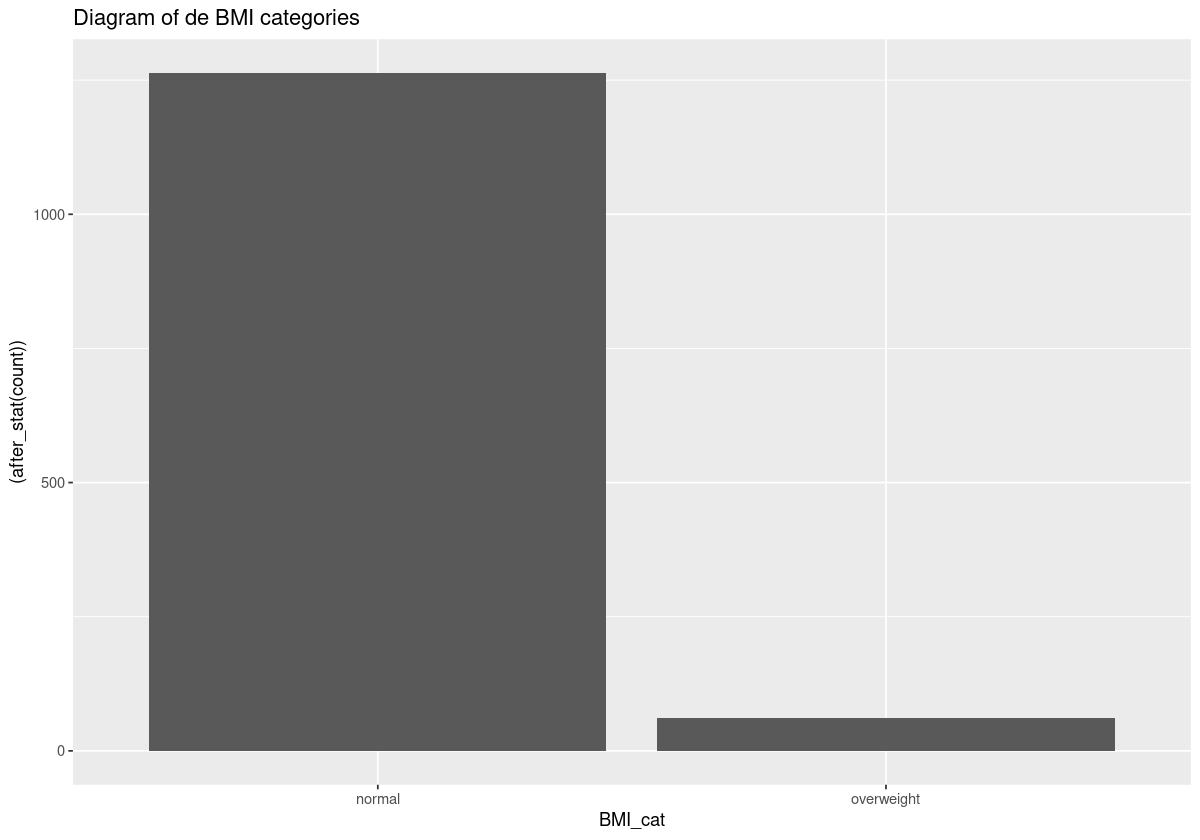

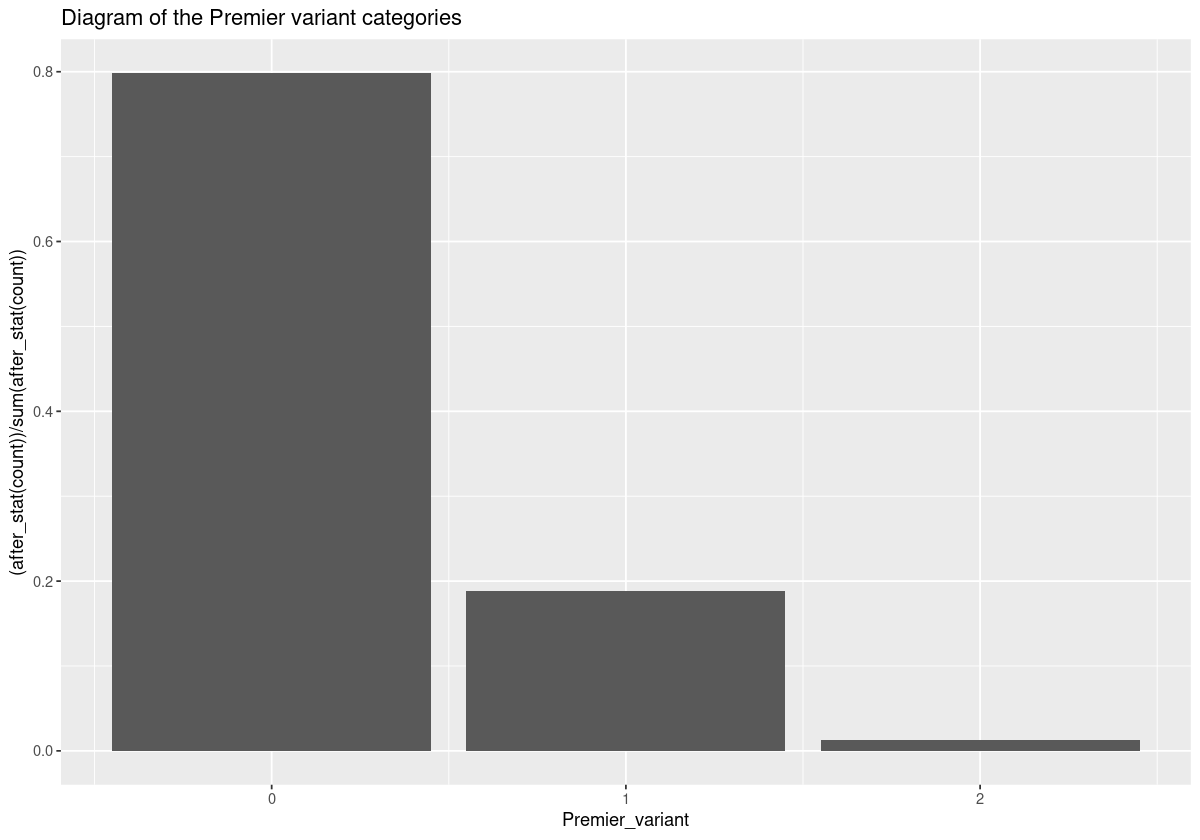

In [39]:
ggplot(data=vizualisation_data) + aes(x=BMI_cat) + geom_bar(aes(y = (after_stat(count)))) + ggtitle("Diagram of de BMI categories")
ggplot(data=vizualisation_data) + aes(x=Premier_variant) + geom_bar(aes(y = (after_stat(count))/sum(after_stat(count)))) + ggtitle("Diagram of the Premier variant categories")

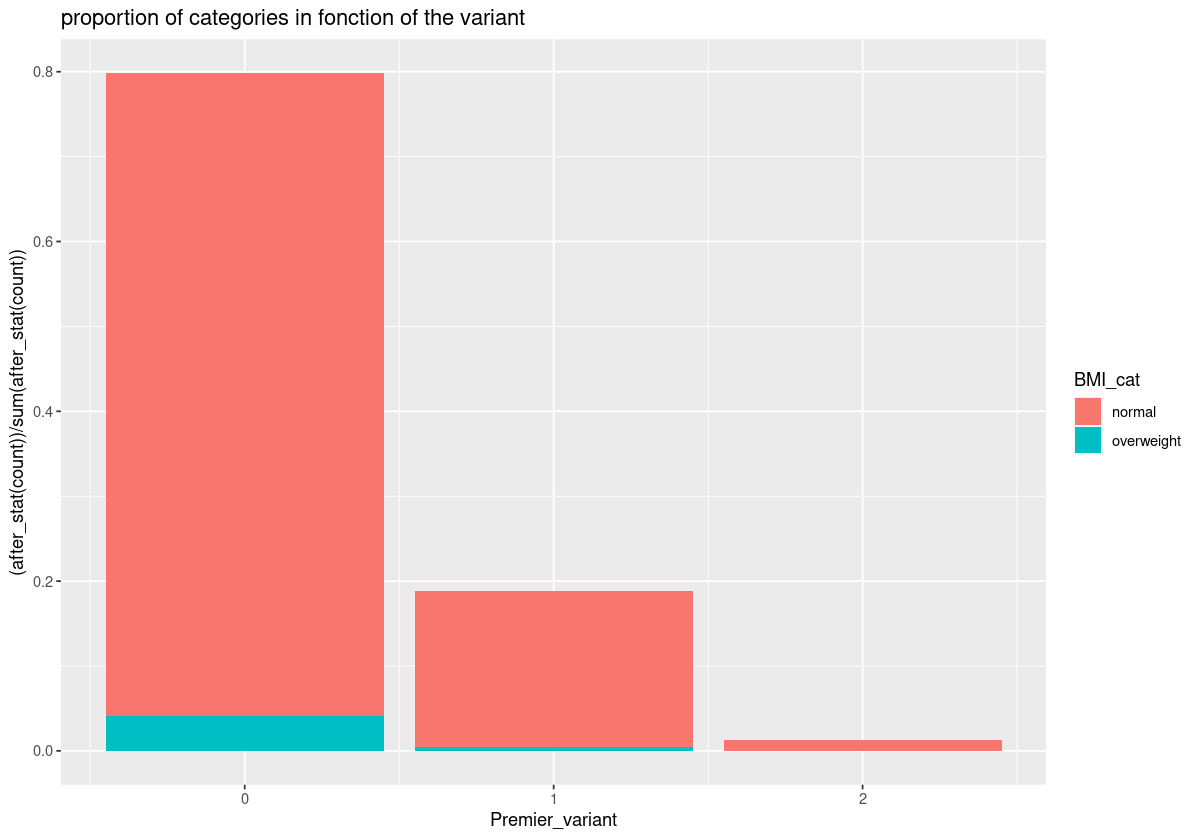

In [40]:
ggplot(vizualisation_data) + aes(x=Premier_variant, fill=BMI_cat) + geom_bar(aes(y = (after_stat(count))/sum(after_stat(count)))) + ggtitle("proportion of categories in fonction of the variant")

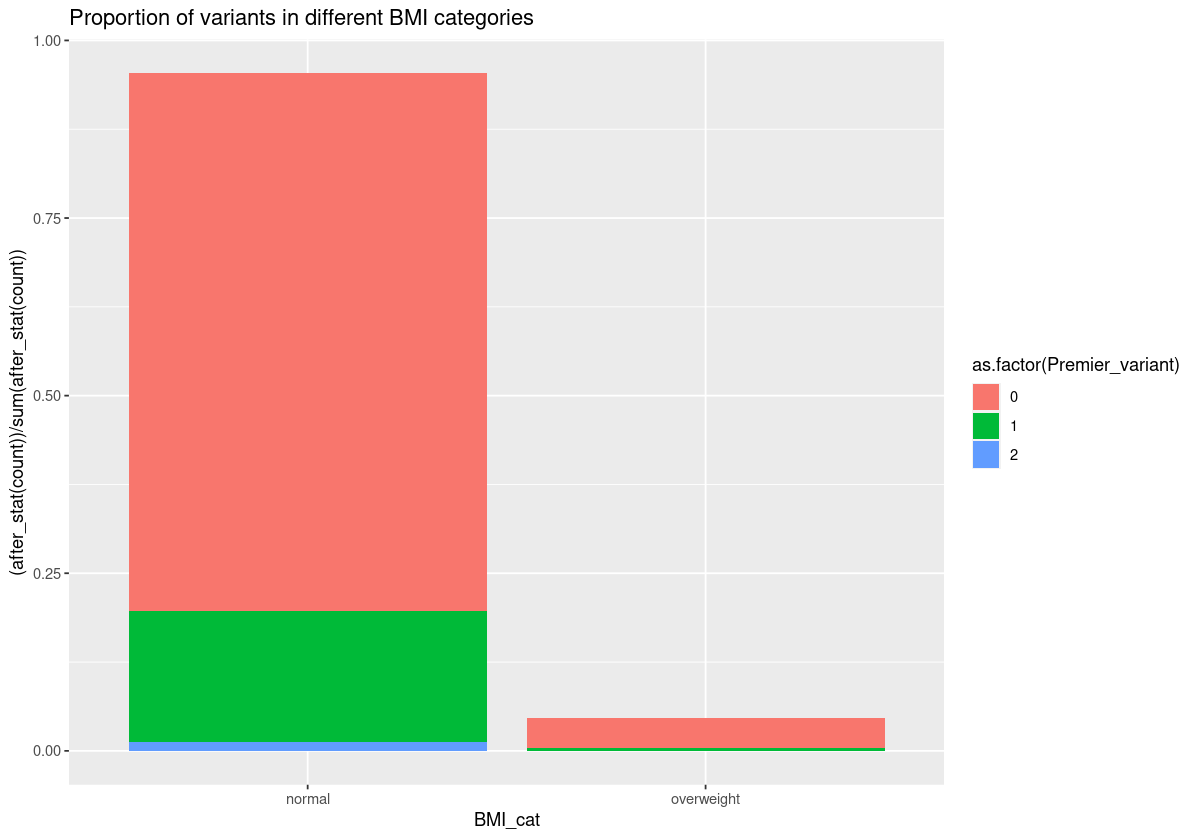

In [41]:
vizualisation_data$BMI_cat = factor(vizualisation_data$BMI_cat)

ggplot(vizualisation_data) +
  aes(x = BMI_cat, fill = as.factor(Premier_variant)) +
  geom_bar(aes(y = (after_stat(count))/sum(after_stat(count)))) +
  ggtitle("Proportion of variants in different BMI categories")

It is hard to conclude on something because we don't have a lot of data for each category

## Question 3

In [42]:
table(genotypes[1:1324,1], phenotypes$BMI_cat)

   
    normal overweight
  0   1002         55
  1    244          6
  2     17          0

We observe that there are no data or not so many so the $\chi^2$ independance test is maybe not the best test to do because it is asymptotic

In [43]:
chisq.test(genotypes[1:1324,1],phenotypes$BMI_cat)

Warning message in chisq.test(genotypes[1:1324, 1], phenotypes$BMI_cat):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  genotypes[1:1324, 1] and phenotypes$BMI_cat
X-squared = 4.4471, df = 2, p-value = 0.1082


In this case, we can use the Fisher's test

We test $H_0$: "the BMI category is independant from the premier variant" against $H_1$: "the BMI category is not independant from the premier variant"

In [44]:
fisher.test(genotypes[1:1324,1], phenotypes$BMI_cat)


	Fisher's Exact Test for Count Data

data:  genotypes[1:1324, 1] and phenotypes$BMI_cat
p-value = 0.1363
alternative hypothesis: two.sided


In the both case the p_value is higher than 10% so we can keep the hypothesis $H_0$ with a risk of  $\alpha = 5\%$ and conclude that they are independant.

## Question 4

In [45]:
compt = 1
pvalues = c()
while(compt <= dim(genotypes)[2]){
    pvalues = c(pvalues, fisher.test(genotypes[1:1324,compt], phenotypes$BMI_cat)$p.value)
    compt = compt + 1
}

In [46]:
sum(pvalues <= 0.05)

[1] 1534

In [47]:
sum(pvalues <= 0.01)

[1] 307

We observe that, with a risk of $\alpha = 5\%$, we reject 1534 times the independance of the variant with the BMI

and with a risk of $\alpha = 1\%$, we reject 307 times the independance

We can do the hypothesis that some variant are relevant to explain BMI

## Question 5

Now , we do the same thing with a random vector

In [48]:
set.seed(0)
random_vector = rbinom(dim(genotypes)[1], size = 1, prob = 0.5)

In [49]:
compt = 1
pvalues2 = c()
while(compt <= dim(genotypes)[2]){
    pvalues2 = c(pvalues2, fisher.test(genotypes[1:1324,compt], random_vector)$p.value)
    compt = compt + 1
}

In [50]:
sum(pvalues2 <= 0.05)

[1] 1574

In [51]:
sum(pvalues2 <= 0.01)

[1] 316

We observe the same proportion of rejection of the independance with the random vector and the BMI categories for $\alpha = 5\%$ and $\alpha = 1\%$

## Question 6

In conclusion, the proportion of variant that are relevant to explain the BMI categories are the same for the random vector.

We can forget our first hypothesis because the variant that we found relevant were just probably false positive.

To verify it, we can compute the proportion of p_values that are lower than the risk

for a risk of $\alpha = 5\%$, we have 1534 p_values lower than 0.05 for a total of 32019 different variant so the proportion of positive test is $\frac{1534}{32019} \approx 5\% $

for a risk of $\alpha = 1\%$, we have 307 p_values lower than 0.01 so the proportion of positive test is $\frac{307}{32019} \approx 1\% $

Finally, we can't explain the BMI categories with the genetic.